# Assignment - Networking for Big Data and Laboratory

### Import Libraries

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
import time
import pandas as pd
from tqdm import tqdm
import math

### Assignment Part 1

1. **Use library scripts to generate p-ER random graphs and
r-regular random graph. Let K denote the number of nodes.**

In [ ]:
# Generate p-ER random graphs
def p_ER_graph_generation(K,p):
    G_ER = nx.erdos_renyi_graph(K,p, seed=None)
    return(G_ER)

In [ ]:
# Generate r-regular random graphs
def r_regular_graph_generation(r,K):
    G_R = nx.generators.random_graphs.random_regular_graph(r, K, seed=None)
    return(G_R)

2. **Write a script to check the connectivity of a given graph:**
- Algebraic method 1 (irreducibility)
- Algebraic method 2 ((eigenvalue of the Laplacian matrix))
- Breadth-Frist search algorihm


In [ ]:
# Algebraic method 1 (irreducibility) 
def check_connected_by_irreducibility(graph, K):
    A = nx.adjacency_matrix(graph)
    A = A.todense()
    Matrix_Sum = np.identity(K)

    for i in range(1 , K-1):
        A_pow = np.linalg.matrix_power(A, i)
        Matrix_Sum = Matrix_Sum + A_pow
    
    return Matrix_Sum.all() > 0

In [ ]:
# Algebraic method 2 (eigenvalue of the Laplacian matrix)
def check_connected_by_laplacian(graph, K):
    A = nx.adjacency_matrix(graph)  
    A = A.todense()

    D = np.zeros(shape=(K,K))

    np.fill_diagonal(D, [nx.degree(graph)[i] for i in range(K)])

    L = D - A
    vals, vecs = np.linalg.eig(L)
    return sorted(vals)[1] > 0

In [ ]:
# Breadth-Frist search algorihm 
def check_connected_by_BFS(graph, s):
    visited = []
    queue = []
 
    queue.append(s)
    visited.append(s)
 
    while queue:
        s = queue.pop(0)
        for i in graph.neighbors(s):
            if i not in visited:
                queue.append(i)
                visited.append(i)
    
    return True if sorted(visited) == sorted(graph.nodes) else False

3. **Compare the complexity as a function of K of the methods
above by plotting curves of a complexity measure vs K.**

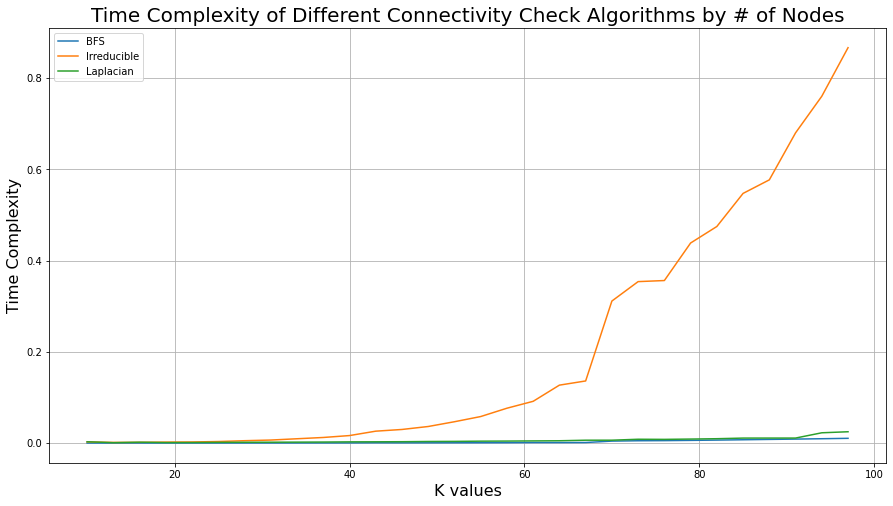

In [ ]:
elements1 = []
elements2 = []
elements3 = []

times1 = []
times2 = []
times3 = []
for k in range(10, 100,3):
    # generate some integers
    graph = nx.erdos_renyi_graph(k ,0.5, seed=20)
    # print(i)
    start = time.process_time()
    check_connected_by_BFS(graph, 1)
    end = time.process_time()
    elements1.append(k)

    times1.append(end-start)
  
    start = time.process_time()
    check_connected_by_irreducibility(graph, k)
    end = time.process_time()
    elements2.append(k)
    times2.append(end-start)

    start = time.process_time()
    check_connected_by_laplacian(graph, k)
    end = time.process_time()
    elements3.append(k)
    times3.append(end-start)

plt.figure(num = 3, figsize=(15, 8))
plt.xlabel('K values', fontsize = 16)
plt.ylabel('Time Complexity', fontsize = 16)
plt.title('Time Complexity of Different Connectivity Check Algorithms by # of Nodes', fontsize = 20)
plt.plot(elements1, times1, label ='BFS')
plt.plot(elements2, times2, label ='Irreducible')
plt.plot(elements3, times3, label ='Laplacian')
plt.grid()
plt.legend()
plt.show()
# This code is contributed b

4. **Let Pc(G) denote the probability that a graph G is connected.
By running Monte Carlo simulations, estimate pc(G) and
produce two curve plots:**
- pc(G) vs. p for Erd os-Renyi graphs with K = 100. 
- pc(G) vs. K, for K ≤ 100, for r-regular random graphs with
r = 2 and r = 8.

100%|██████████| 32/32 [17:01<00:00, 31.91s/it]
No handles with labels found to put in legend.


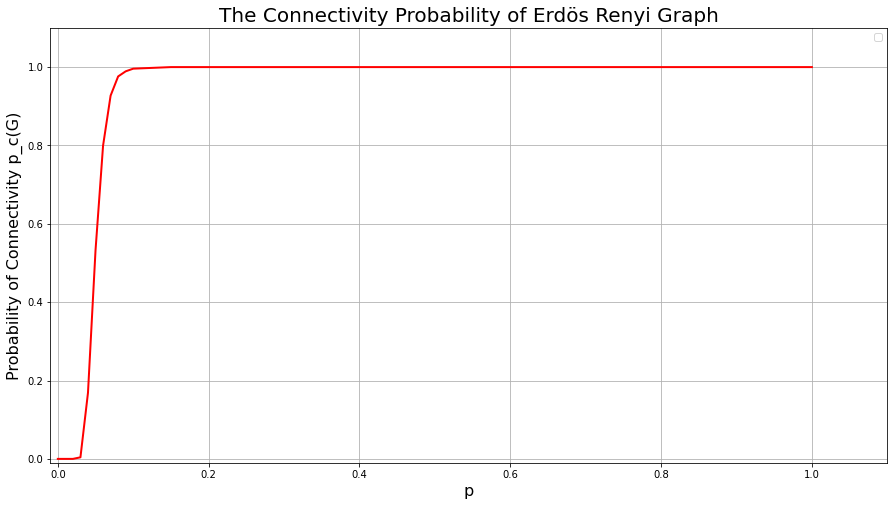

In [ ]:
# pc(G) vs. p for Erd os-Renyi graphs with K = 100.

K = 100
N = 5000
p_array = [0, 0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.9, 0.95, 1]
prob_p_ER_array = list()

len_p = len(p_array)

for j in tqdm(range(len_p)):
    p = p_array[j]
    BFS_list = list()
    for i in range(N):

        G = p_ER_graph_generation(K,p)
        BFS = check_connected_by_BFS(G, 1)
        BFS_list.append(BFS)

    prob_p_ER = sum(BFS_list)/N
    prob_p_ER_array.append(prob_p_ER)

plt.figure(num = 3, figsize=(15, 8))
plt.plot(p_array, prob_p_ER_array,
         color='red',   
         linewidth=2.0)
plt.xlim((-0.01, 1.1))  
plt.ylim((-0.01, 1.1))
plt.xlabel("p", fontsize = 16)
plt.ylabel("Probability of Connectivity p_c(G)", fontsize = 16)
plt.title("The Connectivity Probability of Erdös Renyi Graph", fontsize = 20)

plt.grid()
plt.legend()
plt.show()

100%|██████████| 91/91 [18:57<00:00, 12.50s/it]


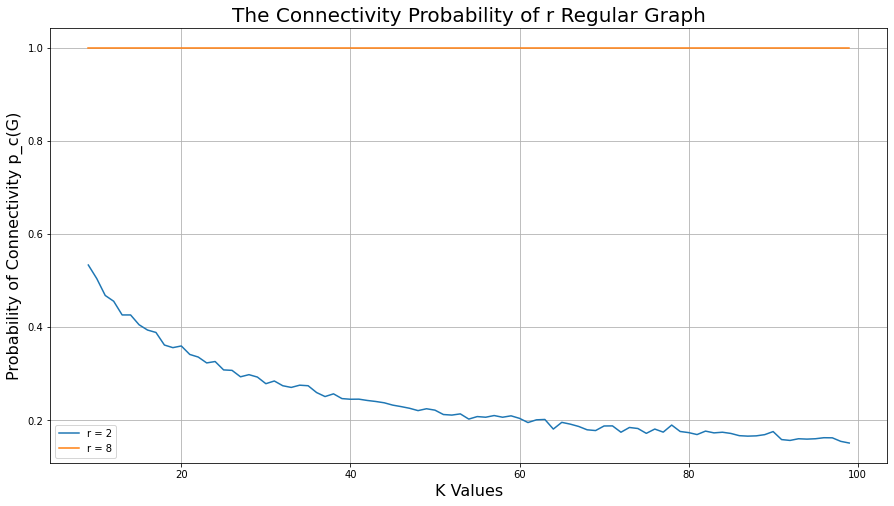

In [ ]:
# pc(G) vs. K, for K ≤ 100, for r-regular random graphs withr = 2 and r = 8.
K = 100
N = 5000
prob_r_2_reg_array = []
prob_r_8_reg_array = []

for j in tqdm(range(9,K)):
    
    BFS_list_r_2 = []
    BFS_list_r_8 = []
    
    for i in range(N):
        G_r_2 = r_regular_graph_generation(2,j)
        G_r_8 = r_regular_graph_generation(8,j)
        BFS_G_r_2 = check_connected_by_BFS(G_r_2, 1)
        BFS_G_r_8 = check_connected_by_BFS(G_r_8, 1)
        BFS_list_r_2.append(BFS_G_r_2)
        BFS_list_r_8.append(BFS_G_r_8)

    prob_r_reg_2 = sum(BFS_list_r_2)/N
    prob_r_2_reg_array.append(prob_r_reg_2)
    
    prob_r_reg_8 = sum(BFS_list_r_8)/N
    prob_r_8_reg_array.append(prob_r_reg_8)


array_k = np.arange(9,K)

plt.figure(num = 3, figsize=(15, 8))
plt.xlabel("K Values", fontsize = 16)
plt.ylabel("Probability of Connectivity p_c(G)", fontsize = 16)
plt.title("The Connectivity Probability of r Regular Graph", fontsize = 20)

plt.plot(array_k, prob_r_2_reg_array, label ='r = 2')
plt.plot(array_k, prob_r_8_reg_array, label ='r = 8')

plt.grid()
plt.legend()
plt.show()


### Assignment Part 2

**We aim to compare throughput offered by Fat-Tree and Jellyfish for the same amount of resources.**
- N = # of servers.
- S = # of switches.
- L = # of links connecting switches.
- n = # number of ports of a switch.
- h_bar = mean shortest path lengths for server-to-server paths.

1. **Find r (# of switch ports to be connected to other switches in Jellyfish) as a function of n so that N, S and L are the same for Jellyfish and Fat-tree.** 

    **Answer:** in the Report file.

2. **Write the expression of the application-oblivious throughput
bound TH for an all-to-all traffic matrix among servers. The
expression of TH must be a function of h and n only.**

    **Answer:** in the Report file

3. **Using the exact value of h as a function of n for Fat-Tree (you
must calculate it!) and the lower bound of h for r-regular
random graphs (see slides, but be careful with notation) for
Jellyfish, evaluate TH for n = 20, 30, 40, 50, 60.**

In [42]:
results = pd.DataFrame(columns=['n', 'N', 'S', 'L', 'TH_Fat_Tree', 'TH_Jellyfish'])


n_list = [20, 30, 40, 50, 60]

for n in n_list:

    ## Fat Tree

    N = (n**3)/4 # number of servers
    vf = (n**6-4*(n**3))/32 # number of traffic flows
    l = 3*n**3/4

    # Form h _bar
    fat_tree_h_bar = (6*N - (n**2)/2 - n - 2)/(N-1)

    # Calculate TH
    Fat_TH = l/(fat_tree_h_bar*vf)


    ### Jellyfish 

    S = 5*(n**2)/4 # number of switches
    vf = (n**6-4*(n**3))/32 # number of traffic flows
    r = (4*n)/5 # the number of switch ports
    L = n**3/2

    # Calculate k
    k = 1 + math.floor(math.log(S-(2*(S-1)/r))/math.log(r-1))

    # Calculate R
    summ_1 = 0
    for j in range(1,k):
        summ_1 += r*((r-1)**(j-1))
    R = S - 1 - summ_1

    # Form h bar
    summ_2 = 0
    for j in range(1,k):
        summ_2 += j*r*((r-1)**(j-1))
    
    jelly_h_bar = (summ_2 + k*R)/(S-1)

    # Calculate TH
    jelly_TH = l/(jelly_h_bar*vf)

    results = results.append({'n': n, 'N': N, 'S': S, 'L': L, 'TH_Fat_Tree':Fat_TH, 'TH_Jellyfish': jelly_TH }, ignore_index=True)


print(results)

      n        N       S         L  TH_Fat_Tree  TH_Jellyfish
0  20.0   2000.0   500.0    4000.0     0.000509      0.001223
1  30.0   6750.0  1125.0   13500.0     0.000150      0.000360
2  40.0  16000.0  2000.0   32000.0     0.000063      0.000152
3  50.0  31250.0  3125.0   62500.0     0.000032      0.000078
4  60.0  54000.0  4500.0  108000.0     0.000019      0.000045
